# Group project 1 - Conway's Game of Life
## Due January 25th

Conway's Game of Life is a "no-player never-ending game" played on board of squares.  It was invented by [John Conway](https://www.theguardian.com/science/2015/jul/23/john-horton-conway-the-most-charismatic-mathematician-in-the-world) in 1968, out of a desire to create a demonstration of how simple rules might lead to complex behavior, much like how relatively simple physical processes generated all of earth's complicated biodiversity, at least in microcosmic sense.  For our purposes, it will yield a fun and interesting starting point for practicing some useful python skills prior to diving into some more mathematical topics.  

The rules of the game are simple, and we'll develop them sequentially.  We begin by defining a rectangular board of cells, each of which can be either "alive" or "dead".  A good size to begin with is 10x10.  The best way to store this board is as a numpy array.  **Import numpy and create the board, with all positions initially set to "dead" (or false, as the case may be).**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a boolean numpy array to act as the board here, and initialize it to all false values.  You
# may find the commands np.zeros and the array's astype method to be useful here

board = np.zeros((10,10), dtype=int)

#1d board array
# board = np.zeros(100, dtype=bool)

# create initial board (horiz line 3x1)
board[0][3] = 1
board[0][4] = 1
board[0][5] = 1
board

Now that we have the board, the next thing that we'll need to do is to define our initial configuration, or *state*.  While we will change this in the future, set a line of three adjacent cells either vertically or horizontally in the middle of the board.  You can use numpy's array indexing for this, e.g. if you wanted to initialize a 2x2 square with corner at position i=2,j=2, you could set S[2:4,2:4]=True, if S is the name of your board.

Now we get to the rules of the game.  Life is a dynamical system, which is to say that 
$$
S_{t+1} = F(S_t)
$$
or the next board state is a function of the current board state, where $S_t$ is the board state at an integer "time" $t$.  The rules that define $F$ are simple, and here we'll just state them in words rather than in equations.
 - If a cell is currently alive, and it has two or three neighbors (out of eight possible) that are also alive, then it remains alive.
 - If a cell is dead, but has three neighbors (out of eight possible) that are alive, then it becomes alive.
 - All other cells become or remain dead.  
 
It's also necessary to consider what happens at the edges of the domain.  You should use *periodic boundary conditions*, which is to say that if you are considering the neighbors of a cell that exists, for example on the right edge of the board, you would count its five neighboring cells on the rights side of the board, and also three cells on the left edge (and vice versa.  And analogously for the top and bottom).  **Create a python function that takes as an argument the existing board state and returns a new board state based on the rules described above.  Try to make this function as efficient as possible!** 

In [ ]:
(5+1)%10

In [ ]:
def update_board(game_array):
    length = len(game_array)
    S_new = np.zeros(game_array.shape, dtype=int)
    
    for i in range(len(game_array)): # rows
        for j in range(len(game_array)): # columns
            # here, we use modulo length to wrap around the edges of the board,
            # detecting neighbors on the opposite side of the board if necessary
            # (this is slow)
            num_neighbors = np.sum((game_array[i, (j-1)%length] +            # left (j-1 % length gives us the left cell i.e. j=0 -> j-1 = -1 -> -1 % length = 9.. when length = 10)
                                    game_array[i, (j+1)%length] +            # right (j+1 % length gives us the right cell i.e. j=9 -> j+1 = 10 -> j+1 % length = 0)
                                    game_array[(i-1)%length, j] +            # top (i-1 % length gives us the top cell i.e. i=0 -> i-1 = -1 -> -1 % length = 9.. when length = 10)
                                    game_array[(i+1)%length, j] +            # bottom (i+1 % length gives us the bottom cell i.e. i=9 -> i+1 = 10 -> i+1 % length = 0)
                                    game_array[(i-1)%length, (j-1)%length] + # top left (combined above)
                                    game_array[(i-1)%length, (j+1)%length] + # top right
                                    game_array[(i+1)%length, (j-1)%length] + # bottom left
                                    game_array[(i+1)%length, (j+1)%length])) # bottom right
            S_new[i][j] = game_array[i][j] # copy cell to new board
            if game_array[i][j] == 1: # if cell is alive
                if num_neighbors < 2: # if cell has less than 2 neighbors
                    S_new[i][j] = 0
                elif num_neighbors > 3: # if cell has more than 3 neighbors
                    S_new[i][j] = 0
                else:
                    S_new[i][j] = 1 # if cell has 2 or 3 neighbors
            else:
                if num_neighbors == 3: # if cell has exactly 3 neighbors
                    S_new[i][j] = 1
                else:
                    S_new[i][j] = 0 
    
    return S_new

Do a basic test of your function to ensure correctness.  The reason that I asked you to create a line of three pixels is because the rules above lead to a very simple transformation: a vertical line becomes a horizontal line, and a horizontal line becomes a vertical line.  It will be helpful to visualize this.  **Use matplotlib to visualize your board state both before and after application of the update_board function.** 

In [ ]:
# plot the intial board
plt.imshow(board, interpolation='nearest')

While this is interesting, the real fascinating dynamics of Conway's Game of Life emerge when the update_board function is iterated from time $t=0$ to $t=T$.  Write a for loop that performs this iteration and saves the output at each step to a list.  One common gotcha is that if you append your state array to a list, you may end up with $T$ references to the same array, which of course is being updated.  This is not what you want.  Be sure you save the board state at time $t$ by using a function such as np.copy prior to appending it.  Try running the code for 20 steps.  

In [ ]:
# loop to update the board and save the array to a list
board_list = []
for i in range(20):
    board_list.append(board)
    board = update_board(board)

It would be unwieldy to visualize each of the states of a time-evolving system individually.  A much more natural way of looking at them is to create an animation.  There are many ways to do this, but one nice way is to use the matplotlib FuncAnimation method.  All you need to do is to create an animate function, which takes as argument the frame number and updates a matplotlib plot.  Note that we need to put jupyter into matplotlib notebook mode to make this work (if we ran this code in a normal python interpreter, this wouldn't be required).  It's easier to show than to tell:

In [ ]:
import matplotlib.animation as anim
%matplotlib inline
# %matplotlib widget

# we will animate the board_list array using the FuncAnimation command
fig, ax = plt.subplots()
im = ax.imshow(board_list[0], interpolation='nearest')

def animate_func(i):
    im.set_array(board_list[i])
    return [im]

animation = anim.FuncAnimation(fig, animate_func, frames=len(board_list), interval=100, blit=True)
animation.save('game_of_life.mp4', fps=10)

Feel free to modify the parameters of the animate function, but if all has gone well, what you should be seeing is an oscilllating vertical and horizontal line of 3 pixels.  This isn't a very exciting result, but it should ensure that your code is running correctly. 

Now, let's do something more interesting.  Instead of a line, let's try as an initial state the R-pentomino, which would be
![pentomino](pentomino.png)
**Create a method that initializes the board state to one R-pentomino in the middle.  Rerun the above analysis and write a short qualitative characterization of the types of patterns that appear**.  If you wish, you can make the board larger, say size 100x100 and run the simulation for longer to get a better sense of the results.  

In [ ]:
def init_R_pentomino(N) : # returns an R pentomino shape in the middle of an NxN grid
    board = np.zeros((N,N), dtype=int) # create empty board
    board[N//2-1][N//2] = 1
    board[N//2-1][N//2+1] = 1
    board[N//2][N//2-1] = 1
    board[N//2][N//2] = 1
    board[N//2+1][N//2] = 1
    return board

In [ ]:
def update_board_vectorized(game_array):
    # create copy to work with
    game_copy = game_array.copy()
    # create shifted versions of the game board to represent each neighbor
    # this is a vectorized version of the old update_board function which was just a double for loop (slow)
    # np.roll shifts the array by the specified amount, wrapping around the edges (very useful for this)
    # game_copy is the original board, shift is the amount to shift, axis is the direction to shift (0 = rows, 1 = columns)
    left = np.roll(game_copy, shift=1, axis=1)
    right = np.roll(game_copy, shift=-1, axis=1)
    up = np.roll(game_copy, shift=1, axis=0)
    down = np.roll(game_copy, shift=-1, axis=0)
    up_left = np.roll(up, shift=1, axis=1)
    up_right = np.roll(up, shift=-1, axis=1)
    down_left = np.roll(down, shift=1, axis=1)
    down_right = np.roll(down, shift=-1, axis=1)

    # Sum all the neighbors to get the total count around each cell
    total_neighbors = left + right + up + down + up_left + up_right + down_left + down_right

    # Apply Game of Life rules: 
    # 1. Any live cell with two or three live neighbors survives.
    # 2. Any dead cell with three live neighbors becomes a live cell.
    # 3. All other live cells die in the next generation. Similarly, all other dead cells stay dead.
    born = (game_copy == 0) & (total_neighbors == 3)
    survive = (game_copy == 1) & ((total_neighbors == 2) | (total_neighbors == 3))
    game_copy[:] = 0  # Reset the game board
    game_copy[born | survive] = 1  # Update with new born or surviving cells

    return game_copy

In [ ]:
new_board = init_R_pentomino(100)
new_board_list = []
for i in range(1000):
    new_board_list.append(new_board)
    new_board = update_board_vectorized(new_board)

fig, ax = plt.subplots()
# change size of figure
fig.set_size_inches(10, 10)
im = ax.imshow(new_board_list[0], interpolation='nearest')

def animate_func(i):
    im.set_array(new_board_list[i])
    return [im]

animation = anim.FuncAnimation(fig, animate_func, frames=len(new_board_list), interval=50, blit=True)
animation.save('game_of_life_R_pentomino.mp4', fps=10)

The R pentomino leads to the generation of several shapes.  

 The Square, which is a stable shape that does not change over time.

 The Bar, which oscillates between two states (vertical and horizontal)

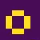 The Box, which appears stable until hit by another shape.

 This glider, which moves diagonally across the board.

An easy way to get a sense of the diversity generated by Life's rules is to begin with a random board state.  **Generate a board of size 100x100 with each pixel either alive or dead with 50% probability**.  (A useful function for doing this might be numpy.random.randint).  **Run the game for 1000 iterations.  Write a characterization of the types of patterns that appear.  As a guide, there is a common vernacular for characterizing these different patterns: still life (stable and non-changing patterns), oscillators (you've already seen one example with the horizontal/vertical line), and gliders.  Describe some pixel patterns that fall into each of these categories.**

In [ ]:
def get_random_board(N): # returns an NxN grid with random 1s and 0s (50/50 chance)
    board = np.random.randint(2, size=(N,N))
    return board

random_board = get_random_board(100)
random_board_list = []
average_neighbors_list = []
for i in range(1000):
    random_board_list.append(random_board)
    random_board = update_board(random_board)

fig, ax = plt.subplots()
# change size of figure
fig.set_size_inches(10, 10)
im = ax.imshow(random_board_list[0], interpolation='nearest')

def animate_func(i):
    im.set_array(random_board_list[i])
    return [im]

animation = anim.FuncAnimation(fig, animate_func, frames=len(random_board_list), interval=50, blit=True)
animation.save('game_of_life_random.mp4', fps=10)

Once again, we see some unique patterns emerge from the random board state.

(same as above) +

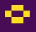 The Rectangle Box, which appears stable until hit by another shape.

 The Arrow, which is stable.

 The Double Arrow, which is stable.

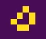 The Chicken Nugget, which is stable.

 This glider, which moves across the board to the bottom left.

Next, let's ask an analytical question: Given the randomized board state above, does the total number of live pixels ever stabilize?  Stated another way, if I ran the simulation above 100 times, and queried the number of live pixels on the board at $t=1000$, would they be similar each time?  **Devise a way to address this question.  Write a short statement with your conclusion, and generate one figure using matplotlib that supports your analysis**.

My inintial assumption is that they will be different, as the starting state of the board plays a major role in the end state.

In [ ]:
# running the random sim 100 times and plotting the # of living cells at the end of each run
random_board_list = []
average_neighbors_list = []
for i in range(1): # create 100 random boards for the simulation
    random_board = get_random_board(100)
    random_board_list.append(random_board)

for i in range(len(random_board_list)): # run each board through the simulation (each board is the initial state, we want the final state added to the avg neighbbors list after 1000 iterations)
    for j in range(1000):
        random_board_list[i] = update_board(random_board_list[i])
    print('board', i, 'done')
    average_neighbors_list.append(np.sum(random_board_list[i]))

In [ ]:
# running the random sim 100 times and plotting the # of living cells at the end of each run
random_board_list = []
average_neighbors_list = []
for i in range(100): # create 100 random boards for the simulation
    random_board = get_random_board(100)
    random_board_list.append(random_board)

for i in range(len(random_board_list)): # run each board through the simulation (each board is the initial state, we want the final state added to the avg neighbbors list after 1000 iterations)
    for j in range(1000):
        random_board_list[i] = update_board_vectorized(random_board_list[i])
    average_neighbors_list.append(np.sum(random_board_list[i]))

In [ ]:
plt.plot(average_neighbors_list)
plt.xlabel('Simulation #')
plt.ylabel('Number of Living Cells')
plt.title('Number of Living Cells at end of Random Simulation')
# show average line
plt.axhline(np.mean(average_neighbors_list), color='r', linestyle='dashed', linewidth=1)
# show standard deviation lines
plt.axhline(np.mean(average_neighbors_list)+np.std(average_neighbors_list), color='black', linestyle='dashed', linewidth=1)
plt.axhline(np.mean(average_neighbors_list)-np.std(average_neighbors_list), color='black', linestyle='dashed', linewidth=1)
plt.show()

In [ ]:
plt.hist(average_neighbors_list, bins=10)

Finally, one aspect of Life that I find interesting is the fragility of the rule set.  **Make some simple modification to the rules.  Write a short statement describing what you changed and how it affected the dynamics of the system.**

In [ ]:
def get_random_board_2(N): # returns an NxN grid with random 1s and 0s (25/75 chance)
    board = np.random.choice([0, 1], size=(N,N), p=[0.75, 0.25])
    return board

def get_horiz_line_board(N, length): # returns an NxN grid with a horizontal line of 1s in the middle with length 'length'
    board = np.zeros((N,N), dtype=int) # create empty board
    for i in range(length):
        board[N//2][N//2+i-length//2] = 1
    return board

def get_vert_line_board(N, length): # returns an NxN grid with a vertical line of 1s in the middle with length 'length'
    board = np.zeros((N,N), dtype=int) # create empty board
    for i in range(length):
        board[N//2+i-length//2][N//2] = 1
    return board

def get_square_board(N, length): # returns an NxN grid with a filled square in the middle with length 'length'
    board = np.zeros((N,N), dtype=int) # create empty board
    for i in range(length):
        for j in range(length):
            board[N//2+i-length//2][N//2+j-length//2] = 1
    # add asymmetry to the square
    board[N//2-1][N//2-length//2-3] = 1
    board[N//2-2][N//2-length//2-3] = 1
    board[N//2-1][N//2-length//2-2] = 1
    board[N//2-2][N//2-length//2-2] = 1
    return board

def update_board_vectorized_new(game_array):
    # create copy to work with
    game_copy = game_array.copy()
    # Create shifted versions of the game board to represent each neighbor
    left = np.roll(game_copy, shift=1, axis=1)
    right = np.roll(game_copy, shift=-1, axis=1)
    up = np.roll(game_copy, shift=1, axis=0)
    down = np.roll(game_copy, shift=-1, axis=0)
    up_left = np.roll(up, shift=1, axis=1)
    up_right = np.roll(up, shift=-1, axis=1)
    down_left = np.roll(down, shift=1, axis=1)
    down_right = np.roll(down, shift=-1, axis=1)

    # Sum all the neighbors to get the total count around each cell
    total_neighbors = left + right + up + down + up_left + up_right + down_left + down_right

    # Apply Custom Game of Life rules: 
    classic = False
    replicator = False
    seeds = False
    coral = True
    if replicator:
        born = (game_copy == 0) & ((total_neighbors == 1) | (total_neighbors == 3) | (total_neighbors == 5) | (total_neighbors == 7))
        survive = (game_copy == 1) & ((total_neighbors == 1) | (total_neighbors == 3) | (total_neighbors == 5) | (total_neighbors == 7))
    elif classic:
        born = (game_copy == 0) & (total_neighbors == 3)
        survive = (game_copy == 1) & ((total_neighbors == 2) | (total_neighbors == 3))
    elif seeds:
        born = (game_copy == 0) & (total_neighbors == 2)
        survive = (game_copy == 1)
    elif coral:
        born = (game_copy == 0) & ((total_neighbors == 3))
        survive = (game_copy == 1) & ((total_neighbors == 4) | (total_neighbors == 5) | (total_neighbors == 6) | (total_neighbors == 7) | (total_neighbors == 8))
    game_copy[:] = 0  # Reset the game board
    game_copy[born | survive] = 1  # Update with new born or surviving cells (born | survive means born OR survive, =1 means alive, so this line means if born OR survive, cell is alive)

    return game_copy

board = get_square_board(64, 8)
board_list = []
for i in range(1000):
    board_list.append(board)
    board = update_board_vectorized_new(board)

fig, ax = plt.subplots()
# change size of figure
fig.set_size_inches(10, 10)
im = ax.imshow(board_list[0], interpolation='nearest')

def animate_func(i):
    im.set_array(board_list[i])
    return [im]

animation = anim.FuncAnimation(fig, animate_func, frames=len(board_list), interval=50, blit=True)
animation.save('game_of_life_random_new_half.mp4', fps=10)

Beyond the classic rule set, I have introduced three additional game of life rulesets.  

The first, called replicator, has the same rules for both dead and alive cells (live cells survive on the same conditions dead cells are born).  This creates a pattern that grows exponentially in a symmetrical fashion and then all dies at once.

The second, called seeds, births cells with 1 neighbor and lets all seeds survive.  This creates a pattern that grows exponentially in a symmetrical fashion and fills the screen.

The third and final ruleset is called coral.  Seeds are born with three neighbors and survive with 4 or more neighbors.  This creates a slowly growing pattern that almost resembles coral.

A video of all three can be found below.

https://youtu.be/X-oSDWPvPt0